In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt
%matplotlib inline

In [2]:
df_bom = pd.read_csv('bom.movie_gross.csv')
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


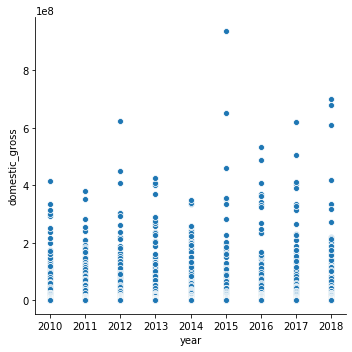

In [4]:
sns.relplot(x='year', y='domestic_gross', data=df_bom, kind='scatter')

In [5]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
tmbd = pd.read_csv('tmdb.movies.csv')
tmbd.columns = [x.strip() for x in tmbd.columns]
tmbd.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
df_imdb = pd.read_csv('imdb.name.basics.csv')
df_imdb.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [9]:
alive = df_imdb['death_year'].isna()

In [10]:
imdb_alive = df_imdb[alive]
display(imdb_alive.info())
imdb_alive.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599865 entries, 0 to 606647
Data columns (total 6 columns):
nconst                599865 non-null object
primary_name          599865 non-null object
birth_year            76464 non-null float64
death_year            0 non-null float64
primary_profession    549317 non-null object
known_for_titles      569766 non-null object
dtypes: float64(2), object(4)
memory usage: 32.0+ MB


None

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [11]:
def split(x):    
    return x.split(",")


In [12]:
imdb_alive['primary_profession'] = imdb_alive.primary_profession.apply(lambda x: split(x))

AttributeError: 'float' object has no attribute 'split'

In [14]:
df_imdb2 = pd.read_csv('imdb.title.akas.csv')
df_imdb2.columns = [x.strip() for x in df_imdb2.columns]
df_imdb2.sort_values(['title_id','ordering']).head(5)

,title_id,ordering,title,region,language,types,attributes,is_original_title
108150,tt0063540,1,Sangharsh,IN,hi,NaN,alternative transliteration,0.0
108151,tt0063540,2,Sunghursh,NaN,NaN,original,NaN,1.0
108152,tt0063540,3,Sunghursh,IN,NaN,NaN,NaN,0.0
108153,tt0063540,4,Sunghursh,IN,hi,NaN,alternative transliteration,0.0
108154,tt0063540,5,Sungharsh,IN,hi,NaN,alternative spelling,0.0


In [15]:
US = df_imdb2[df_imdb2['region'] == 'US']
US.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0


In [16]:
df_imdb3 = pd.read_csv('imdb.title.basics.csv')
df_imdb3.columns = [x.strip() for x in df_imdb3.columns]
df_imdb3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [17]:
df_imdb4 = pd.read_csv('imdb.title.crew.csv')
df_imdb4.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [18]:
df_imdb4.columns = [x.strip() for x in df_imdb4.columns]
df_imdb4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [19]:
df_imdb4['title_id'] = df_imdb4['tconst']
df_imdb4.columns

Index(['tconst', 'directors', 'writers', 'title_id'], dtype='object')

In [20]:
df_imbd5 = pd.read_csv('imdb.title.principals.csv')
df_imbd5.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [21]:
df_imbd5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [22]:
df_imbd6 = pd.read_csv('imdb.title.ratings.csv')
df_imbd6.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [23]:
df_imbd6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
df_rt= pd.read_csv('rt.movie_info.tsv', '\t')

In [25]:
df_rt.sort_values('box_office').head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
86,108,A picture-perfect family moves into an upscale...,R,Comedy|Drama|Kids and Family,Derrick Borte,Derrick Borte,"Apr 16, 2010","Aug 10, 2010",$,"1,000,000",93 minutes,Roadside Attractions
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
809,1046,Writer/director Rodrigo Garca (Nine Lives) tea...,R,Drama,NaN,NaN,"May 7, 2010","Dec 14, 2010",$,"1,110,286",126 minutes,Sony Pictures Classics
1087,1398,"A heartfelt tale of inspiration, hope and rede...",PG,Drama|Kids and Family|Faith and Spirituality,David Nixon|Patrick Doughtie,NaN,"Apr 9, 2010","Aug 10, 2010",$,"1,121,000",110 minutes,Vivendi Entertainment
1213,1564,Real-life sweethearts Michael Cera and Charlyn...,PG-13,Comedy,Nicholas Jasenovec,Nicholas Jasenovec|Charlyne Yi,"Aug 14, 2009","Dec 1, 2009",$,"1,149,350",89 minutes,Overture Films


In [26]:
budgets = pd.read_csv('tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
budgets.duplicated(subset='movie').value_counts()

False    5698
True       84
dtype: int64

In [28]:
budgets.loc[:,'production_budget'] = [x.replace('$',"") for x in budgets.loc[:,'production_budget']]
budgets.loc[:,'domestic_gross'] = [x.replace('$',"") for x in budgets.loc[:,'domestic_gross']]
budgets.loc[:,'worldwide_gross'] = [x.replace('$',"") for x in budgets.loc[:,'worldwide_gross']]

In [29]:
budgets.loc[:,'production_budget'] = [x.replace(',',"") for x in budgets.loc[:,'production_budget']]
budgets.loc[:,'domestic_gross'] = [x.replace(',',"") for x in budgets.loc[:,'domestic_gross']]
budgets.loc[:,'worldwide_gross'] = [x.replace(',',"") for x in budgets.loc[:,'worldwide_gross']]

In [30]:
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'])
budgets['domestic_gross'] = pd.to_numeric(budgets['domestic_gross'])
budgets['worldwide_gross'] = pd.to_numeric(budgets['worldwide_gross'])

In [31]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


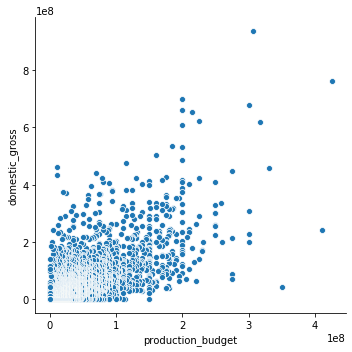

In [32]:
sns.relplot(x='production_budget', y='domestic_gross', data=budgets)

In [33]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['title'] = budgets['movie']

In [34]:
merge = pd.merge(df_imdb2, budgets, how='right', on='title',indicator=True)

In [35]:
merge.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,_merge
0,tt0369610,14.0,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,both
1,tt0369610,15.0,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,both
2,tt0369610,16.0,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,both
3,tt0369610,20.0,Jurassic World,SE,NaN,imdbDisplay,NaN,0.0,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,both
4,tt0369610,29.0,Jurassic World,US,NaN,NaN,NaN,0.0,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,both


In [36]:
dups = merge.duplicated(subset='movie')

In [37]:
dups.value_counts()

True     8190
False    5698
dtype: int64

In [38]:
merge_unique = merge.drop_duplicates(subset='movie')

In [39]:
merge_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 13887
Data columns (total 15 columns):
title_id             2440 non-null object
ordering             2440 non-null float64
title                5698 non-null object
region               1752 non-null object
language             260 non-null object
types                1487 non-null object
attributes           81 non-null object
is_original_title    2440 non-null float64
id                   5698 non-null int64
release_date         5698 non-null datetime64[ns]
movie                5698 non-null object
production_budget    5698 non-null int64
domestic_gross       5698 non-null int64
worldwide_gross      5698 non-null int64
_merge               5698 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 673.4+ KB


In [40]:
id_missing = merge_unique.title_id.isna()
merge_unique[id_missing].head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,_merge
10608,NaN,NaN,Star Wars Ep. VIII: The Last Jedi,NaN,NaN,NaN,NaN,NaN,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,right_only
10609,NaN,NaN,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,NaN,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,right_only
10610,NaN,NaN,Pirates of the Caribbean: At Worldâs End,NaN,NaN,NaN,NaN,NaN,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,right_only
10611,NaN,NaN,Spider-Man 3,NaN,NaN,NaN,NaN,NaN,16,2007-05-04,Spider-Man 3,258000000,336530303,894860230,right_only
10612,NaN,NaN,Harry Potter and the Half-Blood Prince,NaN,NaN,NaN,NaN,NaN,20,2009-07-15,Harry Potter and the Half-Blood Prince,250000000,302089278,935213767,right_only


In [41]:
merge_unique['_merge'].value_counts()

right_only    3258
both          2440
left_only        0
Name: _merge, dtype: int64

In [42]:
merge2 = pd.merge(df_imdb4, merge_unique, how='right', on='title_id')

In [43]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 18 columns):
tconst               2440 non-null object
directors            2428 non-null object
writers              2332 non-null object
title_id             2440 non-null object
ordering             2440 non-null float64
title                5698 non-null object
region               1752 non-null object
language             260 non-null object
types                1487 non-null object
attributes           81 non-null object
is_original_title    2440 non-null float64
id                   5698 non-null int64
release_date         5698 non-null datetime64[ns]
movie                5698 non-null object
production_budget    5698 non-null int64
domestic_gross       5698 non-null int64
worldwide_gross      5698 non-null int64
_merge               5698 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 806.9+ KB


In [44]:
dups2 = merge2.duplicated(subset='movie')
dups2.value_counts()

False    5698
dtype: int64

In [45]:
merge3 = pd.merge(tmbd, merge2, how='right', on='title')

In [46]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 6069
Data columns (total 27 columns):
Unnamed: 0           2296 non-null float64
genre_ids            2296 non-null object
id_x                 2296 non-null float64
original_language    2296 non-null object
original_title       2296 non-null object
popularity           2296 non-null float64
release_date_x       2296 non-null object
title                6070 non-null object
vote_average         2296 non-null float64
vote_count           2296 non-null float64
tconst               2803 non-null object
directors            2791 non-null object
writers              2677 non-null object
title_id             2803 non-null object
ordering             2803 non-null float64
region               2024 non-null object
language             319 non-null object
types                1709 non-null object
attributes           91 non-null object
is_original_title    2803 non-null float64
id_y                 6070 non-null int64
release_

In [47]:
dups3 = merge3.duplicated(subset='movie')
dups3.value_counts()

False    5698
True      372
dtype: int64

In [48]:
merge3_unique = merge3.drop_duplicates(subset='movie')
merge3_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 6069
Data columns (total 27 columns):
Unnamed: 0           1924 non-null float64
genre_ids            1924 non-null object
id_x                 1924 non-null float64
original_language    1924 non-null object
original_title       1924 non-null object
popularity           1924 non-null float64
release_date_x       1924 non-null object
title                5698 non-null object
vote_average         1924 non-null float64
vote_count           1924 non-null float64
tconst               2440 non-null object
directors            2428 non-null object
writers              2332 non-null object
title_id             2440 non-null object
ordering             2440 non-null float64
region               1752 non-null object
language             260 non-null object
types                1487 non-null object
attributes           81 non-null object
is_original_title    2440 non-null float64
id_y                 5698 non-null int64
release_

In [49]:
merge4 = pd.merge(df_imdb3, merge3_unique, how='right', on='tconst')

In [50]:
merge4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 32 columns):
tconst               2440 non-null object
primary_title        2440 non-null object
original_title_x     2440 non-null object
start_year           2440 non-null float64
runtime_minutes      2305 non-null float64
genres               2431 non-null object
Unnamed: 0           1924 non-null float64
genre_ids            1924 non-null object
id_x                 1924 non-null float64
original_language    1924 non-null object
original_title_y     1924 non-null object
popularity           1924 non-null float64
release_date_x       1924 non-null object
title                5698 non-null object
vote_average         1924 non-null float64
vote_count           1924 non-null float64
directors            2428 non-null object
writers              2332 non-null object
title_id             2440 non-null object
ordering             2440 non-null float64
region               1752 non-null object
lan

In [51]:
dups4 = merge4.duplicated(subset='movie')
dups4.value_counts()

False    5698
dtype: int64

In [52]:
merge5 = pd.merge(df_imbd5, merge4, how='right', on='tconst')

In [53]:
merge5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26271 entries, 0 to 26270
Data columns (total 37 columns):
tconst               23013 non-null object
ordering_x           23009 non-null float64
nconst               23009 non-null object
category             23009 non-null object
job                  7824 non-null object
characters           9272 non-null object
primary_title        23013 non-null object
original_title_x     23013 non-null object
start_year           23013 non-null float64
runtime_minutes      21945 non-null float64
genres               22959 non-null object
Unnamed: 0           17764 non-null float64
genre_ids            17764 non-null object
id_x                 17764 non-null float64
original_language    17764 non-null object
original_title_y     17764 non-null object
popularity           17764 non-null float64
release_date_x       17764 non-null object
title                26271 non-null object
vote_average         17764 non-null float64
vote_count           17764

In [54]:
dups5 = merge5.duplicated(subset='movie')
dups5.value_counts()

True     20573
False     5698
dtype: int64

In [55]:
merge5_unique = merge5.drop_duplicates(subset='movie')
merge5_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 26270
Data columns (total 37 columns):
tconst               2440 non-null object
ordering_x           2436 non-null float64
nconst               2436 non-null object
category             2436 non-null object
job                  1005 non-null object
characters           350 non-null object
primary_title        2440 non-null object
original_title_x     2440 non-null object
start_year           2440 non-null float64
runtime_minutes      2305 non-null float64
genres               2431 non-null object
Unnamed: 0           1924 non-null float64
genre_ids            1924 non-null object
id_x                 1924 non-null float64
original_language    1924 non-null object
original_title_y     1924 non-null object
popularity           1924 non-null float64
release_date_x       1924 non-null object
title                5698 non-null object
vote_average         1924 non-null float64
vote_count           1924 non-null float64
dir

In [56]:
merge6 = pd.merge(imdb_alive, merge5_unique, how='right', on='nconst')

In [57]:
merge6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 42 columns):
nconst                2436 non-null object
primary_name          2388 non-null object
birth_year            904 non-null float64
death_year            0 non-null float64
primary_profession    2355 non-null object
known_for_titles      2381 non-null object
tconst                2440 non-null object
ordering_x            2436 non-null float64
category              2436 non-null object
job                   1005 non-null object
characters            350 non-null object
primary_title         2440 non-null object
original_title_x      2440 non-null object
start_year            2440 non-null float64
runtime_minutes       2305 non-null float64
genres                2431 non-null object
Unnamed: 0            1924 non-null float64
genre_ids             1924 non-null object
id_x                  1924 non-null float64
original_language     1924 non-null object
original_title_y      1924 non-

In [58]:
dups6 = merge6.duplicated(subset='movie')
dups6.value_counts()

False    5698
dtype: int64

In [59]:
merge7 = pd.merge(df_imbd6, merge6, how='right', on='tconst')

In [60]:
merge7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 44 columns):
tconst                2440 non-null object
averagerating         2235 non-null float64
numvotes              2235 non-null float64
nconst                2436 non-null object
primary_name          2388 non-null object
birth_year            904 non-null float64
death_year            0 non-null float64
primary_profession    2355 non-null object
known_for_titles      2381 non-null object
ordering_x            2436 non-null float64
category              2436 non-null object
job                   1005 non-null object
characters            350 non-null object
primary_title         2440 non-null object
original_title_x      2440 non-null object
start_year            2440 non-null float64
runtime_minutes       2305 non-null float64
genres                2431 non-null object
Unnamed: 0            1924 non-null float64
genre_ids             1924 non-null object
id_x                  1924 non

In [61]:
dups7 = merge7.duplicated(subset='movie')
dups7.value_counts()

False    5698
dtype: int64

In [62]:
merge7.head()

,tconst,averagerating,numvotes,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,ordering_x,...,types,attributes,is_original_title,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,_merge
0,tt1043726,4.2,50352.0,nm0503600,NaN,NaN,NaN,NaN,NaN,10.0,...,original,NaN,1.0,42,2014-01-10,The Legend of Hercules,70000000,18848538,58953319,both
1,tt1094666,7.0,1613.0,nm1961889,Jacquelyn Karambelas,NaN,NaN,"editorial_department,visual_effects,editor","tt0870111,tt0808151,tt5232792,tt3874544",10.0,...,imdbDisplay,NaN,0.0,50,2008-03-21,The Hammer,850000,442638,442638,both
2,tt1171222,5.1,8296.0,nm0002969,Dina Lipton,NaN,NaN,"production_designer,art_department,art_director","tt0113749,tt1333125,tt0206314,tt0124198",10.0,...,original,NaN,1.0,38,2013-09-27,Baggage Claim,8500000,21569509,22885836,both
3,tt1210166,7.6,326657.0,nm0006894,Michael De Luca,1965.0,NaN,"producer,miscellaneous,writer","tt0765010,tt1535109,tt1210166,tt1285016",10.0,...,imdbDisplay,NaN,0.0,15,2011-09-23,Moneyball,50000000,75605492,111300835,both
4,tt1212419,6.5,87288.0,nm0185088,Joel Cox,1942.0,NaN,"editor,editorial_department,music_department","tt2179136,tt0418689,tt0327056,tt0105695",10.0,...,original,NaN,1.0,61,2010-10-15,Hereafter,50000000,32746941,108660270,both


In [63]:
df = merge7.copy()

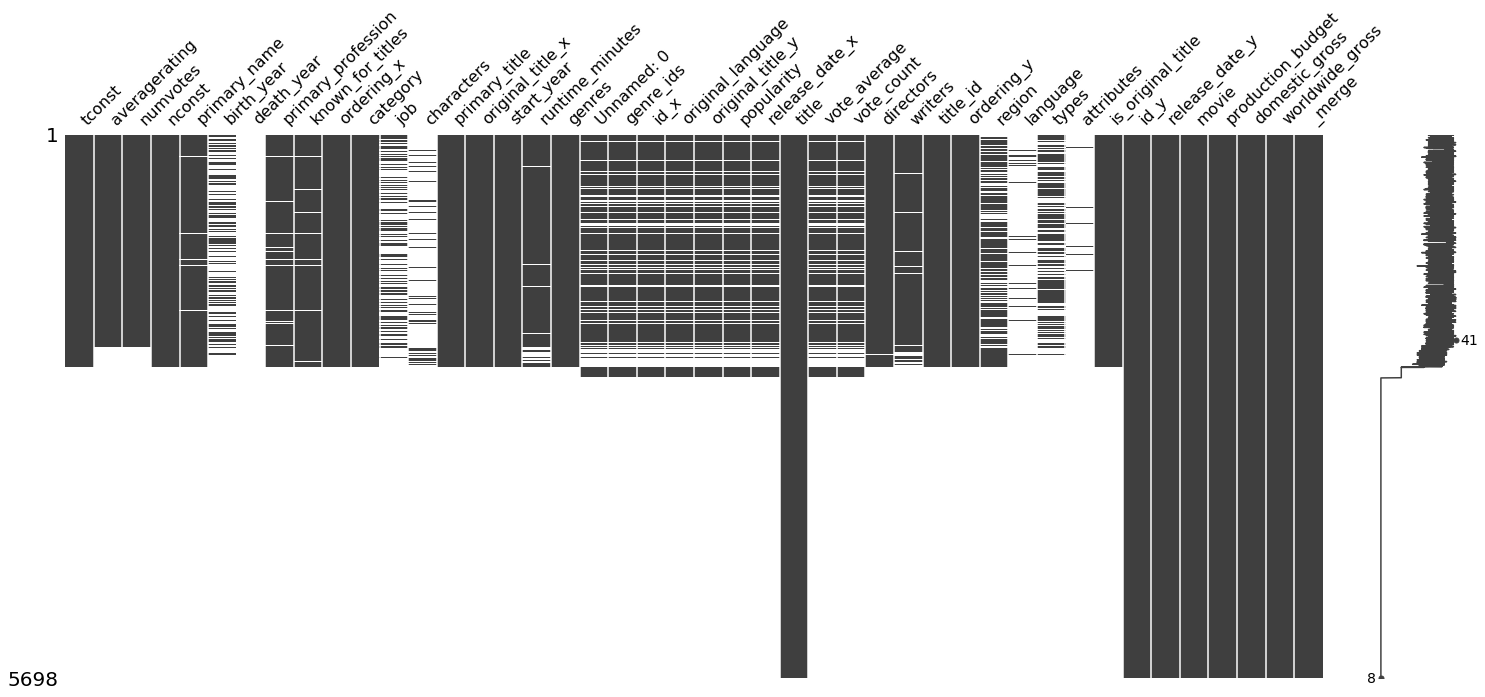

In [64]:
msno.matrix(df)

In [65]:
drop_cols = ['birth_year', 'death_year', 'job','characters', 
             'original_title_x', 'id_x', 'language','attributes', 'is_original_title']

In [66]:
df.drop(drop_cols, axis=1, inplace=True)

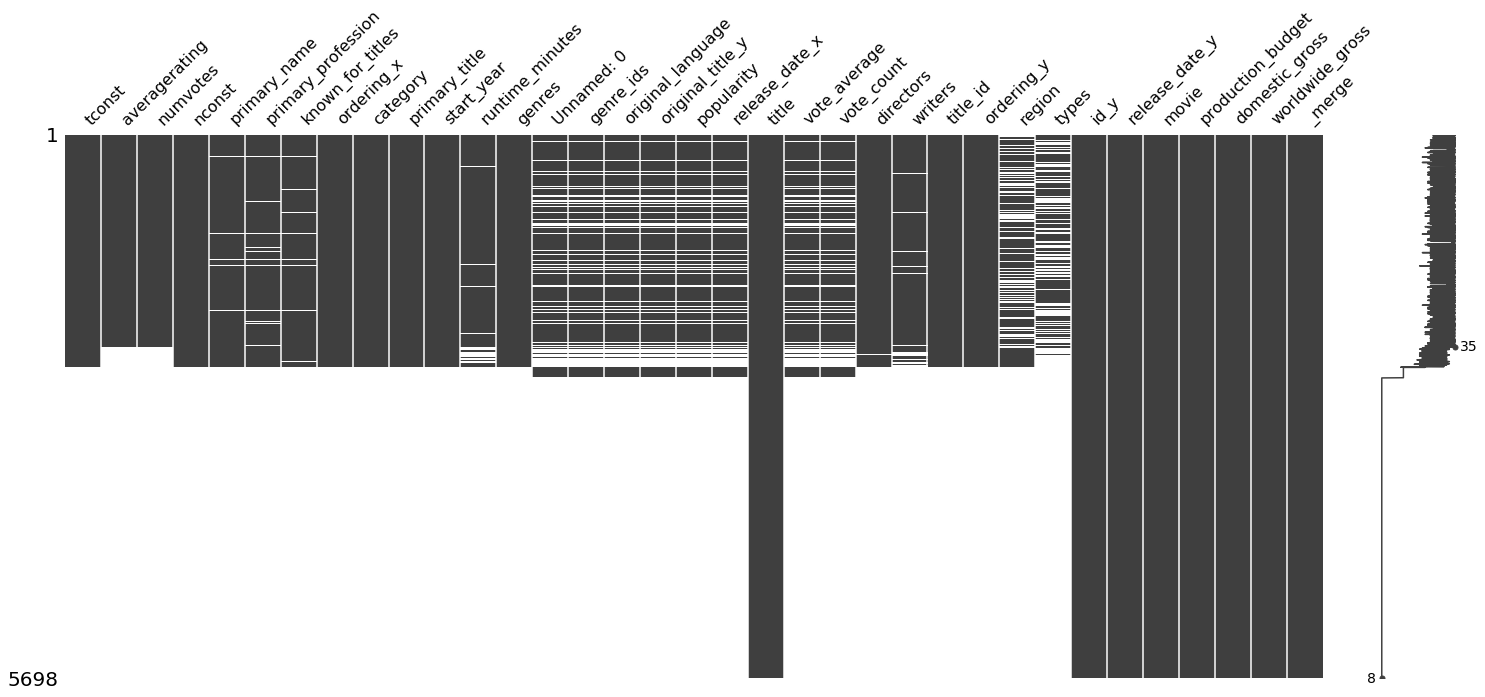

In [67]:
msno.matrix(df)

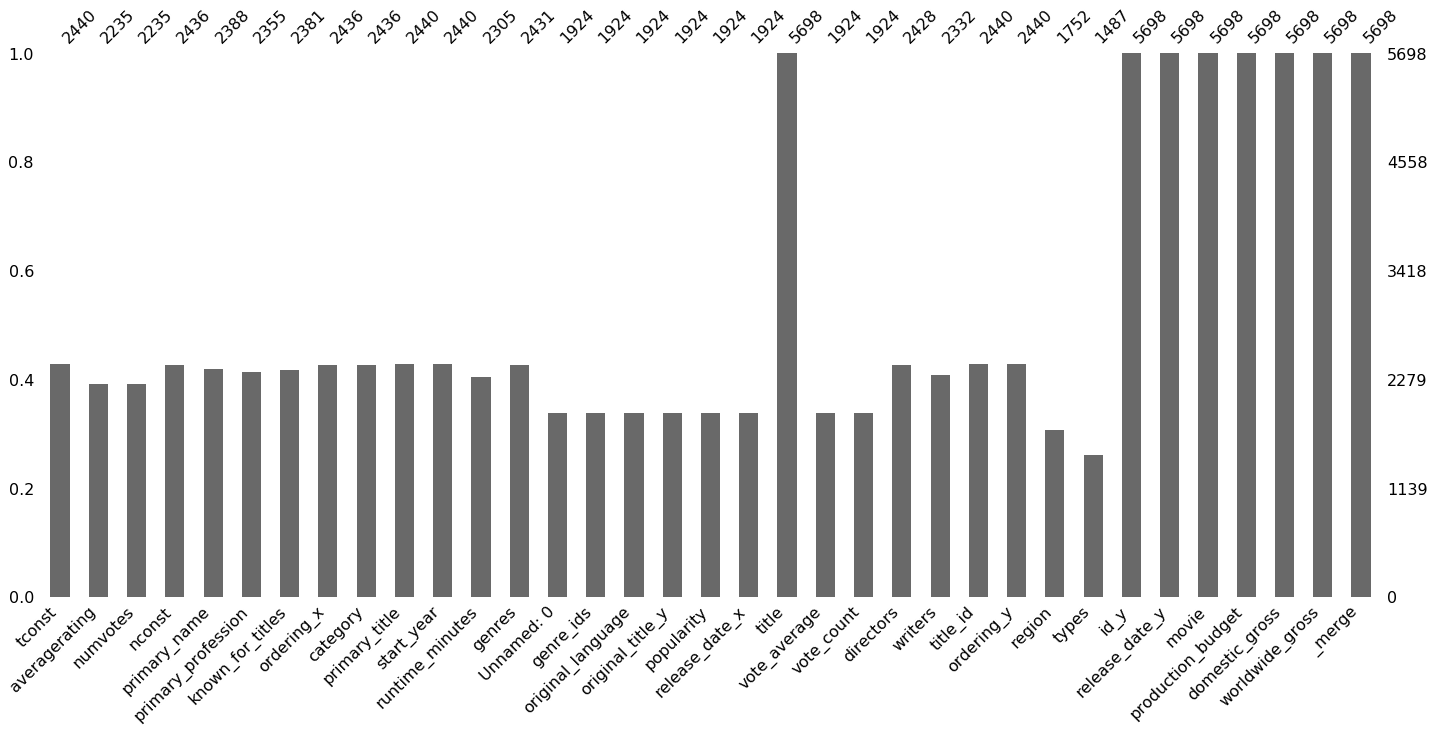

In [68]:
msno.bar(df) ['category', 'primary_name', 'start_year','genres', 'averagerating','numvotes','runtime_minutes','movie', 'production_budget', 'domestic_gross', 'worldwide_gross']

In [69]:
df['domestic_ROI'] = (df['domestic_gross'] - df['production_budget']) / df['production_budget']

In [70]:
df['intl_gross'] = (df['worldwide_gross'] - df['domestic_gross'])

In [71]:
df['intl_ROI'] = (df['intl_gross'] - df['production_budget']) / df['production_budget']

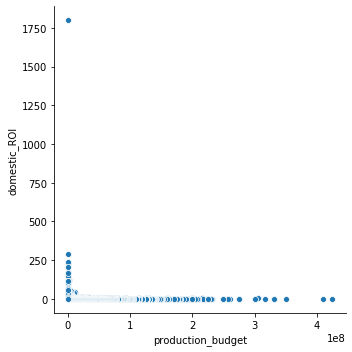

In [72]:
sns.relplot(x='production_budget', y='domestic_ROI', data=df, kind='scatter')

In [74]:
df.sort_values('domestic_ROI', ascending=False).head()

,tconst,averagerating,numvotes,nconst,primary_name,primary_profession,known_for_titles,ordering_x,category,primary_title,...,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,_merge,domestic_ROI,intl_gross,intl_ROI
5677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46,1972-06-30,Deep Throat,25000,45000000,45000000,right_only,1799.000000,0,-1.000000
5691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74,1993-02-26,El Mariachi,7000,2040920,2041928,right_only,290.560000,1008,-0.856000
5546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,right_only,238.819578,86264224,190.698276
5509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,right_only,233.231832,107760901,178.601502
1540,tt2309260,4.2,17763.0,nm2146601,Dean Schnider,"miscellaneous,producer,manager","tt1028532,tt0944947,tt1535438,tt2309260",10.0,producer,The Gallows,...,80,2015-07-10,The Gallows,100000,22764410,41656474,both,226.644100,18892064,187.920640


In [86]:
df_ROI = df.loc[:, ['genres','movie','production_budget','domestic_ROI', 'intl_ROI']]

In [87]:
df_ROI.sort_values('domestic_ROI', ascending=False).head()

,genres,movie,production_budget,domestic_ROI,intl_ROI
5677,NaN,Deep Throat,25000,1799.000000,-1.000000
5691,NaN,El Mariachi,7000,290.560000,-0.856000
5546,NaN,Paranormal Activity,450000,238.819578,190.698276
5509,NaN,The Blair Witch Project,600000,233.231832,178.601502
1540,"Horror,Mystery,Thriller",The Gallows,100000,226.644100,187.920640


In [88]:
df_ROI = df_ROI.set_index('movie')

In [92]:
df_ROI.drop('Deep Throat', inplace=True)

In [93]:
df_ROI.sort_values('domestic_ROI',ascending=False).head()

,genres,production_budget,domestic_ROI,intl_ROI
movie,,,,
El Mariachi,NaN,7000,290.560000,-0.856000
Paranormal Activity,NaN,450000,238.819578,190.698276
The Blair Witch Project,NaN,600000,233.231832,178.601502
The Gallows,"Horror,Mystery,Thriller",100000,226.644100,187.920640
The Brothers McMullen,NaN,50000,207.530120,-1.000000


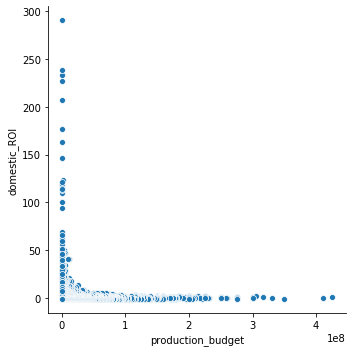

In [109]:
sns.relplot(x='production_budget', y='domestic_ROI', data=df_ROI, kind='scatter')
#removed outlier, plot shows no correlation between budget size and ROI

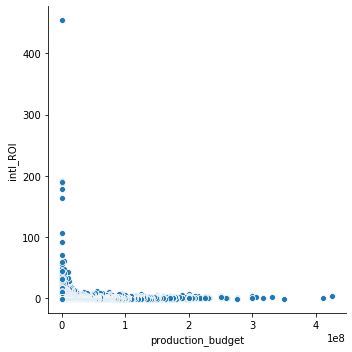

In [110]:
sns.relplot(x='production_budget', y='intl_ROI', data=df_ROI, kind='scatter')

In [113]:
df_ROI.sort_values('intl_ROI', ascending=False).head()

,genres,production_budget,domestic_ROI,intl_ROI,domestic_ROI_log
movie,,,,,
Mad Max,NaN,200000,42.750000,454.000000,3.755369
Bambi,"Biography,Documentary",858000,118.810023,191.544289,4.777526
Paranormal Activity,NaN,450000,238.819578,190.698276,5.475708
The Gallows,"Horror,Mystery,Thriller",100000,226.644100,187.920640,5.423381
The Blair Witch Project,NaN,600000,233.231832,178.601502,5.452033


In [115]:
df_ROI.drop('domestic_ROI_log', axis=1, inplace=True)

In [116]:
df_ROI['production_budget_log'] = np.log(df_ROI['production_budget'])

In [118]:
df_ROI.head()

,genres,production_budget,domestic_ROI,intl_ROI,production_budget_log
movie,,,,,
The Legend of Hercules,"Action,Adventure,Fantasy",70000000,-0.730735,-0.427075,18.064006
The Hammer,"Biography,Drama,Sport",850000,-0.479249,-1.000000,13.652992
Baggage Claim,Comedy,8500000,1.537589,-0.845138,15.955577
Moneyball,"Biography,Drama,Sport",50000000,0.512110,-0.286093,17.727534
Hereafter,"Drama,Fantasy,Romance",50000000,-0.345061,0.518267,17.727534


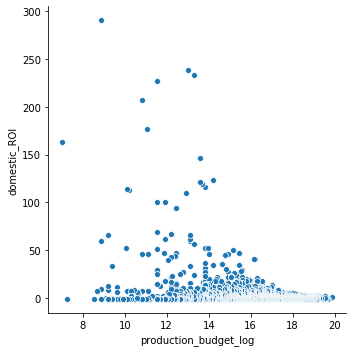

In [119]:
sns.relplot(x='production_budget_log', y='domestic_ROI', data=df_ROI, kind='scatter')

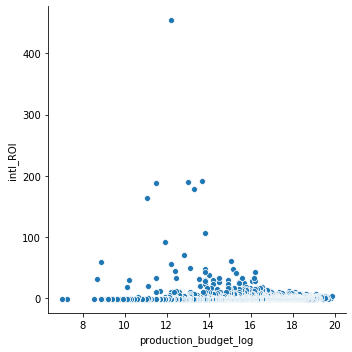

In [117]:
sns.relplot(x='production_budget_log', y='intl_ROI', data=df_ROI, kind='scatter')

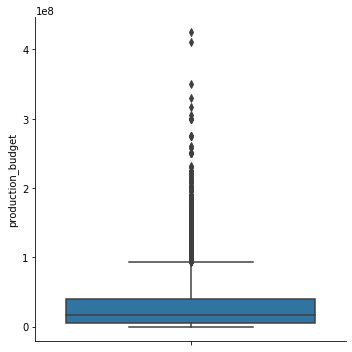

In [124]:
sns.catplot(y='production_budget', data=df_ROI, kind='box')

In [125]:
df_ROI.describe()

,production_budget,domestic_ROI,intl_ROI,production_budget_log
count,5.697000e+03,5697.000000,5697.000000,5697.000000
mean,3.181981e+07,1.516621,0.741498,16.328577
std,4.197892e+07,10.407707,9.070512,1.724688
min,1.100000e+03,-1.000000,-1.000000,7.003065
25%,5.000000e+06,-0.795814,-1.000000,15.424948
50%,1.700000e+07,-0.126556,-0.582759,16.648724
75%,4.000000e+07,1.034641,0.600000,17.504390
max,4.250000e+08,290.560000,454.000000,19.867600


In [126]:
Q1 = df['production_budget'].quantile(0.25)
Q3 = df['production_budget'].quantile(0.75)

In [131]:
IQR = (df_ROI['production_budget'] >= Q1) & (df_ROI['production_budget'] <= Q3)

In [134]:
df_IQR = df_ROI[IQR]

In [135]:
df_IQR.head()

,genres,production_budget,domestic_ROI,intl_ROI,production_budget_log
movie,,,,,
Baggage Claim,Comedy,8500000,1.537589,-0.845138,15.955577
Aloha,"Comedy,Drama,Romance",37000000,-0.431026,-0.882836,17.426428
Hawaii,"Comedy,Drama,Romance",15000000,1.304148,-1.000000,16.523561
Don't Be Afraid of the Dark,"Fantasy,Horror,Thriller",25000000,-0.038133,-0.396810,17.034386
Going the Distance,"Comedy,Romance",32000000,-0.443616,-0.193760,17.281246


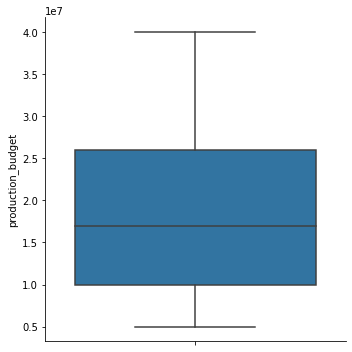

In [140]:
sns.catplot(y='production_budget', data=df_IQR, kind='box')

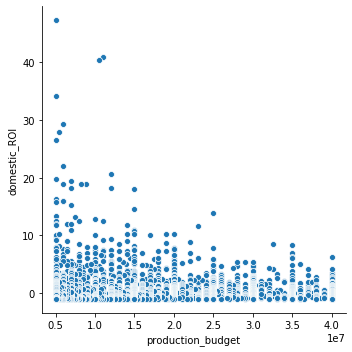

In [144]:
sns.relplot(x='production_budget', y='domestic_ROI', data=df_IQR, kind='scatter')

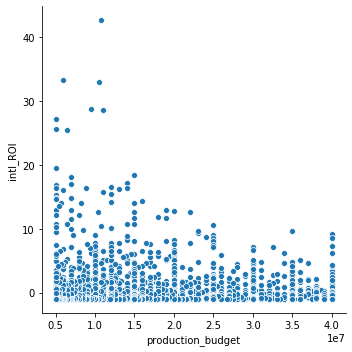

In [143]:
sns.relplot(x='production_budget', y='intl_ROI', data=df_IQR, kind='scatter')

In [145]:
df.columns

Index(['tconst', 'averagerating', 'numvotes', 'nconst', 'primary_name',
       'primary_profession', 'known_for_titles', 'ordering_x', 'category',
       'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'Unnamed: 0', 'genre_ids', 'original_language', 'original_title_y',
       'popularity', 'release_date_x', 'title', 'vote_average', 'vote_count',
       'directors', 'writers', 'title_id', 'ordering_y', 'region', 'types',
       'id_y', 'release_date_y', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', '_merge', 'domestic_ROI',
       'intl_gross', 'intl_ROI'],
      dtype='object')

In [148]:
df['category'].head()

0               producer
1                 editor
2    production_designer
3               producer
4                 editor
Name: category, dtype: object

In [149]:
df_features = df.loc[:,['category', 'primary_name', 'start_year','genres', 'averagerating','numvotes','runtime_minutes','movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]

In [150]:
df_features.head()

,category,primary_name,start_year,genres,averagerating,numvotes,runtime_minutes,movie,production_budget,domestic_gross,worldwide_gross
0,producer,NaN,2014.0,"Action,Adventure,Fantasy",4.2,50352.0,99.0,The Legend of Hercules,70000000,18848538,58953319
1,editor,Jacquelyn Karambelas,2010.0,"Biography,Drama,Sport",7.0,1613.0,108.0,The Hammer,850000,442638,442638
2,production_designer,Dina Lipton,2013.0,Comedy,5.1,8296.0,96.0,Baggage Claim,8500000,21569509,22885836
3,producer,Michael De Luca,2011.0,"Biography,Drama,Sport",7.6,326657.0,133.0,Moneyball,50000000,75605492,111300835
4,editor,Joel Cox,2010.0,"Drama,Fantasy,Romance",6.5,87288.0,129.0,Hereafter,50000000,32746941,108660270


In [153]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 11 columns):
category             2436 non-null object
primary_name         2388 non-null object
start_year           2440 non-null float64
genres               2431 non-null object
averagerating        2235 non-null float64
numvotes             2235 non-null float64
runtime_minutes      2305 non-null float64
movie                5698 non-null object
production_budget    5698 non-null int64
domestic_gross       5698 non-null int64
worldwide_gross      5698 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 694.2+ KB


In [160]:
df_features['genres'].fillna(value='unknown', inplace=True)

In [161]:
df_features['genres'].value_counts()

unknown                      3267
Drama                         204
Comedy                         87
Documentary                    80
Comedy,Drama                   80
                             ... 
Action,Crime,Documentary        1
Biography,Documentary,War       1
Drama,Fantasy,Music             1
Action,Biography,Comedy         1
Animation,Family                1
Name: genres, Length: 308, dtype: int64

In [162]:
df_features['genres'] = df_features['genres'].apply(lambda x: split(x))

In [163]:
df_features.genres.head()

0    [Action, Adventure, Fantasy]
1       [Biography, Drama, Sport]
2                        [Comedy]
3       [Biography, Drama, Sport]
4       [Drama, Fantasy, Romance]
Name: genres, dtype: object

In [165]:
def primary(x):
    return x[0]
primary(df_features['genres'][0])

'Action'

In [166]:
df_features['primary_genres'] = df_features['genres'].apply(lambda x: primary(x))

In [168]:
df_features.primary_genres.value_counts()

unknown        3267
Action          581
Drama           520
Comedy          454
Adventure       224
Biography       153
Horror          149
Crime           127
Documentary     118
Thriller         34
Animation        20
Sci-Fi           11
Mystery          10
Fantasy           8
Family            8
Romance           5
Music             4
Musical           3
Western           1
War               1
Name: primary_genres, dtype: int64

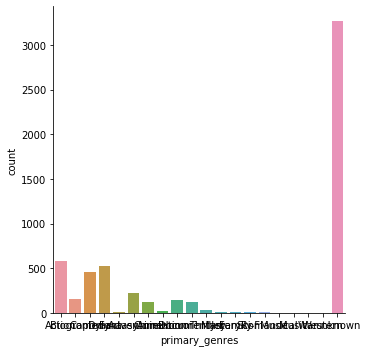

In [171]:
sns.catplot(x='primary_genres', data=df_features, kind='count')

In [202]:
genre = df_features.copy()

In [203]:
mask = genre['primary_genres'] == 'unknown'

In [204]:
primary_genre = genre[~mask]

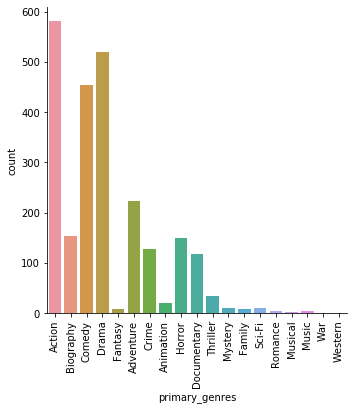

In [181]:
g = sns.catplot(x='primary_genres', data=primary_genre, kind='count')
g.set_xticklabels(rotation = 90)

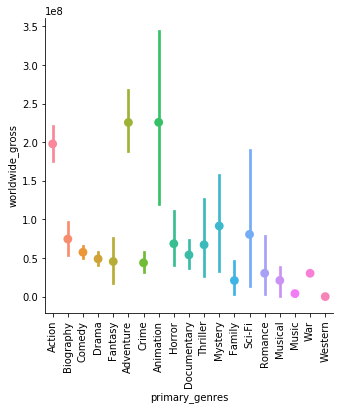

In [246]:
h = sns.catplot(x='primary_genres', y='worldwide_gross', data=primary_genre, kind='point', hue='primary_genres',join=None)
h.set_xticklabels(rotation = 90)

In [189]:
genre['global_ROI'] = (genre['worldwide_gross'] - genre['production_budget']) / genre['production_budget']
genre.head()

,category,primary_name,start_year,genres,averagerating,numvotes,runtime_minutes,movie,production_budget,domestic_gross,worldwide_gross,primary_genres,global_ROI
0,producer,NaN,2014.0,"[Action, Adventure, Fantasy]",4.2,50352.0,99.0,The Legend of Hercules,70000000,18848538,58953319,Action,-0.157810
1,editor,Jacquelyn Karambelas,2010.0,"[Biography, Drama, Sport]",7.0,1613.0,108.0,The Hammer,850000,442638,442638,Biography,-0.479249
2,production_designer,Dina Lipton,2013.0,[Comedy],5.1,8296.0,96.0,Baggage Claim,8500000,21569509,22885836,Comedy,1.692451
3,producer,Michael De Luca,2011.0,"[Biography, Drama, Sport]",7.6,326657.0,133.0,Moneyball,50000000,75605492,111300835,Biography,1.226017
4,editor,Joel Cox,2010.0,"[Drama, Fantasy, Romance]",6.5,87288.0,129.0,Hereafter,50000000,32746941,108660270,Drama,1.173205


In [190]:
primary_genre['global_ROI'] = (primary_genre['worldwide_gross'] - primary_genre['production_budget']) / primary_genre['production_budget']
genre.head()

C:\Users\achil\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,primary_name,start_year,genres,averagerating,numvotes,runtime_minutes,movie,production_budget,domestic_gross,worldwide_gross,primary_genres,global_ROI
0,producer,NaN,2014.0,"[Action, Adventure, Fantasy]",4.2,50352.0,99.0,The Legend of Hercules,70000000,18848538,58953319,Action,-0.157810
1,editor,Jacquelyn Karambelas,2010.0,"[Biography, Drama, Sport]",7.0,1613.0,108.0,The Hammer,850000,442638,442638,Biography,-0.479249
2,production_designer,Dina Lipton,2013.0,[Comedy],5.1,8296.0,96.0,Baggage Claim,8500000,21569509,22885836,Comedy,1.692451
3,producer,Michael De Luca,2011.0,"[Biography, Drama, Sport]",7.6,326657.0,133.0,Moneyball,50000000,75605492,111300835,Biography,1.226017
4,editor,Joel Cox,2010.0,"[Drama, Fantasy, Romance]",6.5,87288.0,129.0,Hereafter,50000000,32746941,108660270,Drama,1.173205


In [205]:
primary_genre.head()

,category,primary_name,start_year,genres,averagerating,numvotes,runtime_minutes,movie,production_budget,domestic_gross,worldwide_gross,primary_genres
0,producer,NaN,2014.0,"[Action, Adventure, Fantasy]",4.2,50352.0,99.0,The Legend of Hercules,70000000,18848538,58953319,Action
1,editor,Jacquelyn Karambelas,2010.0,"[Biography, Drama, Sport]",7.0,1613.0,108.0,The Hammer,850000,442638,442638,Biography
2,production_designer,Dina Lipton,2013.0,[Comedy],5.1,8296.0,96.0,Baggage Claim,8500000,21569509,22885836,Comedy
3,producer,Michael De Luca,2011.0,"[Biography, Drama, Sport]",7.6,326657.0,133.0,Moneyball,50000000,75605492,111300835,Biography
4,editor,Joel Cox,2010.0,"[Drama, Fantasy, Romance]",6.5,87288.0,129.0,Hereafter,50000000,32746941,108660270,Drama


,category,primary_name,start_year,genres,averagerating,numvotes,runtime_minutes,movie,production_budget,domestic_gross,worldwide_gross,primary_genres,global_ROI
0,producer,NaN,1970-01-01 00:00:00.000002014,"[Action, Adventure, Fantasy]",4.2,50352.0,99.0,The Legend of Hercules,70000000,18848538,58953319,Action,-0.157810
1,editor,Jacquelyn Karambelas,1970-01-01 00:00:00.000002010,"[Biography, Drama, Sport]",7.0,1613.0,108.0,The Hammer,850000,442638,442638,Biography,-0.479249
2,production_designer,Dina Lipton,1970-01-01 00:00:00.000002013,[Comedy],5.1,8296.0,96.0,Baggage Claim,8500000,21569509,22885836,Comedy,1.692451
3,producer,Michael De Luca,1970-01-01 00:00:00.000002011,"[Biography, Drama, Sport]",7.6,326657.0,133.0,Moneyball,50000000,75605492,111300835,Biography,1.226017
4,editor,Joel Cox,1970-01-01 00:00:00.000002010,"[Drama, Fantasy, Romance]",6.5,87288.0,129.0,Hereafter,50000000,32746941,108660270,Drama,1.173205


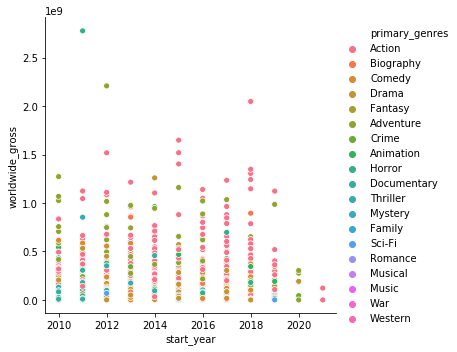

In [252]:
sns.relplot(x='start_year', y='worldwide_gross', data=primary_genre, kind='scatter', hue='primary_genres')

In [213]:
missing_rating = primary_genre['averagerating'].isna()

In [215]:
missing_rating.value_counts(normalize=True)

False    0.918963
True     0.081037
Name: averagerating, dtype: float64

In [216]:
primary_genre.averagerating.fillna(primary_genre.averagerating.median(), inplace=True)

C:\Users\achil\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [217]:
primary_genre.runtime_minutes.fillna(primary_genre.runtime_minutes.median(), inplace=True)

In [238]:
start = primary_genre.groupby(['start_year', 'primary_genres'])['worldwide_gross'].median()

In [243]:
genre_by_year = start.to_frame(name='Worldwide_gross')
genre_by_year.head()

Worldwide_gross
start_year primary_genres                 
2010.0     Action               67255916.0
           Adventure           211739043.0
           Animation            83792062.0
           Biography            18115927.0
           Comedy               21867665.0